In [1]:
import sys, os, pickle
sys.path.append('/scratch/oem214/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import *
from learning_algorithms import *
from optimizers import *
from plotting import *
from wrappers import *
import matplotlib.pyplot as plt

In [2]:
### --- TRAIN ORIGINAL NETWORK --- ###

task = Flip_Flop_Task(3, 0.05, input_magnitudes=None)
N_train = 20000
N_test = 10000
checkpoint_interval = None
sigma = 0

data = task.gen_data(N_train, N_test)

n_in = task.n_in
n_hidden = 32
n_out = task.n_out
W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
W_rec = np.random.normal(0, np.sqrt(1/n_hidden), (n_hidden, n_hidden))
W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))

b_rec = np.zeros(n_hidden)
b_out = np.zeros(n_out)

alpha = 1
sigma = 0

rnn = RNN(W_in, W_rec, W_out, b_rec, b_out,
          activation=tanh,
          alpha=alpha,
          output=identity,
          loss=mean_squared_error)

learn_alg = RFLO(rnn, alpha=alpha, L2_reg=0.0001, L1_reg=0.0001)
optimizer = SGD_Momentum(lr=0.01, mu=0.6)

monitors = []

sim = Simulation(rnn)
sim.run(data, learn_alg=learn_alg, optimizer=optimizer,
        sigma=sigma,
        monitors=monitors,
        verbose=True,
        report_accuracy=False,
        report_loss=True,
        checkpoint_interval=checkpoint_interval)

Progress: 10.0% complete 
Time Elapsed: 0.5s 
Test loss: 0.7676813382689194 

Progress: 20.0% complete 
Time Elapsed: 1.4s 
Test loss: 0.5370056917160613 

Progress: 30.0% complete 
Time Elapsed: 2.2s 
Test loss: 0.10821536725834638 

Progress: 40.0% complete 
Time Elapsed: 3.1s 
Test loss: 0.01840721442253706 

Progress: 50.0% complete 
Time Elapsed: 4.0s 
Test loss: 0.011331420540283028 

Progress: 60.0% complete 
Time Elapsed: 4.9s 
Test loss: 0.008883034411897616 

Progress: 70.0% complete 
Time Elapsed: 5.8s 
Test loss: 0.007462448891279045 

Progress: 80.0% complete 
Time Elapsed: 6.7s 
Test loss: 0.005965791368197233 

Progress: 90.0% complete 
Time Elapsed: 7.5s 
Test loss: 0.0030154740801139786 



In [13]:
### --- DRIFT --- ###
N_train = 2000
N_test = 5000
checkpoint_interval = 10
data = task.gen_data(N_train, N_test)

rnn = sim.rnn

grad_sigma = 0.03
learn_alg = Random_Noise_Gradients(rnn, sigma=grad_sigma)

sim = Simulation(rnn)
sim.run(data, learn_alg=learn_alg, optimizer=optimizer,
        sigma=sigma,
        monitors=monitors,
        verbose=True,
        report_accuracy=False,
        report_loss=True,
        checkpoint_interval=checkpoint_interval)

Progress: 10.0% complete 
Time Elapsed: 0.0s 
Test loss: 0.3406803522574769 

Progress: 20.0% complete 
Time Elapsed: 0.3s 
Test loss: 0.592848039632222 

Progress: 30.0% complete 
Time Elapsed: 0.5s 
Test loss: 0.4100085013017734 

Progress: 40.0% complete 
Time Elapsed: 0.8s 
Test loss: 0.2748376644761535 

Progress: 50.0% complete 
Time Elapsed: 1.0s 
Test loss: 0.4154707809684833 

Progress: 60.0% complete 
Time Elapsed: 1.3s 
Test loss: 0.4848542297226024 

Progress: 70.0% complete 
Time Elapsed: 1.5s 
Test loss: 0.4600444508142172 

Progress: 80.0% complete 
Time Elapsed: 1.8s 
Test loss: 0.3937139663935982 

Progress: 90.0% complete 
Time Elapsed: 2.0s 
Test loss: 0.5414183472187627 



In [15]:
file_name = 'drift_2'

In [16]:
### --- SAVE RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'wb') as f:
    saved_run = {'sim': sim, 'task': task}
    pickle.dump(saved_run, f)

In [ ]:
### --- OPEN RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'rb') as f:
    saved_run = pickle.load(f)
    sim = saved_run['sim']
    task =saved_run['task']

In [17]:
topological_analysis(file_name)

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_drift_2/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/main.py
vanilla-rtrl/main2.py
vanilla-rtrl/main_test.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc
vanill

vanilla-rtrl/learning_algorithms/__pycache__/Future_BPTT.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Future_BPTT.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KF_RTRL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KF_RTRL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KeRNL.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/KeRNL.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Learning_Algorithm.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Learning_Algorithm.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/List_of_Gradients.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__/Only_Output_Weights.cpython-38.pyc
vanilla-rtrl/learning_algorithms/__pycache__/REINFORCE.cpython-37.pyc
vanilla-rtrl/learning_algorithms/__pycache__

vanilla-rtrl/core/__pycache__/Simulation.cpython-37.pyc
vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtr

vanilla-rtrl/test/__pycache__/test_optimizers.cpython-37.pyc
vanilla-rtrl/test/__pycache__/test_utils.cpython-37.pyc
vanilla-rtrl/utils/
vanilla-rtrl/utils/__init__.py
vanilla-rtrl/utils/mathematical_tools.py
vanilla-rtrl/utils/programming_tools.py
vanilla-rtrl/utils/__pycache__/
vanilla-rtrl/utils/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/utils/__pycache__/mathematical_tools.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/mathematical_tools.cpython-38.pyc
vanilla-rtrl/utils/__pycache__/programming_tools.cpython-37.pyc
vanilla-rtrl/utils/__pycache__/programming_tools.cpython-38.pyc
vanilla-rtrl/wrappers/
vanilla-rtrl/wrappers/__init__.py
vanilla-rtrl/wrappers/analyze_main.py
vanilla-rtrl/wrappers/analyze_training_run.py
vanilla-rtrl/wrappers/compare_analyzed_checkpoints.py
vanilla-rtrl/wrappers/compare_checkpoints.py
vanilla-rtrl/wrappers/compare_main.py
vanilla-rtrl/wrappers/topological_analysis.py
vanilla-rtrl/wrappers/write

In [18]:
###Get job status
get_ipython().system('squeue -u oem214')

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           8527383        cm  jupyter   oem214  R      22:11      1 cm07


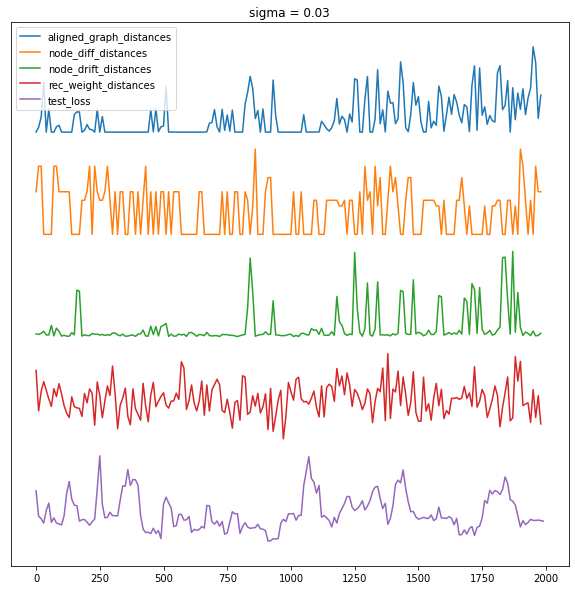

In [19]:
saved_run_name = file_name
analysis_job_name = 'analyze_{}'.format(saved_run_name)
compare_job_name = 'compare_{}'.format(saved_run_name)

results_dir = '/scratch/oem214/learning-dynamics/results/'

analysis_result_path = os.path.join(results_dir, analysis_job_name)
indices, checkpoints = unpack_analysis_results(analysis_result_path)
signals = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss})
fig = plot_signals(signals, x_values=indices,
                   signal_clips={'rec_weight_distances': 5}, title='sigma = {}'.format(grad_sigma))
figs_path = 'figs/drifting_weights/'
fig.savefig(os.path.join(figs_path, '{}.pdf'.format(file_name)), format='pdf')